In [1]:
#Importando as principais bibliotecas

import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

In [2]:
m = 999  # quantidade de mocks

#abrindo os mocks
omega_all = []
for k in range(1, m+1):
    om = np.genfromtxt('xi/xi_'+str(k)+'.dat', delimiter='\t')
    omega_all.append(om[:, 1])
    
np.savetxt(r'./omega_mock_all.csv', omega_all, delimiter=',')

In [3]:
#covariancia

cov = np.cov(omega_all, rowvar=False)
np.savetxt('cov.txt', cov)
print(cov.shape)

(20, 20)


In [4]:
#definindo a lei de potencia
def xi(r, r0, gamma):
    return (r0 / r) ** gamma
    
 #abrindo os resultados para func de correlação das fontes HI   
data = np.genfromtxt('xi.dat', delimiter='\t')
r_data = data[:, 0]
xi_data = data[:, 1]

In [5]:
#ajustando os dados a lei de potência para obter ro e gamma

popt, pcov = curve_fit(xi, r_data, xi_data, sigma=cov)
r0, gamma = popt[0], popt[1]
err = np.sqrt(np.diag(pcov))
err_r0, err_gamma = err[0], err[1]
print(r0)
print(err_r0)
print(gamma)
print(err_gamma)

4.282340696237102
0.39468799894226986
1.626100275776833
0.13196435802182724


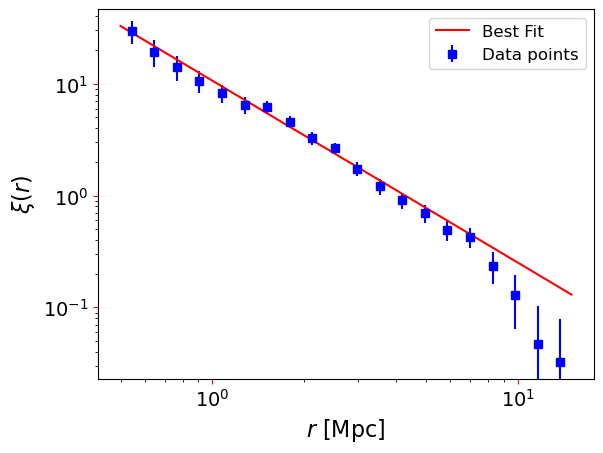

In [6]:
#plotando a função de correlação 

plt.loglog(dpi=300)
plt.errorbar(r_data, xi_data, np.sqrt(np.diag(cov)), fmt='s', color='blue', label='Data points')
plt.tick_params(labelsize=14,color='red')
plt.xlabel(r'$r$ [Mpc]', fontsize=16)
plt.ylabel(r'$\xi(r)$', fontsize=16)

w = np.linspace(0.5, 15, 100)
plt.plot(w, xi(w, r0, gamma), color='red', label='Best Fit')
plt.legend(loc='best', fontsize=12)
plt.savefig('xi_mocks.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()




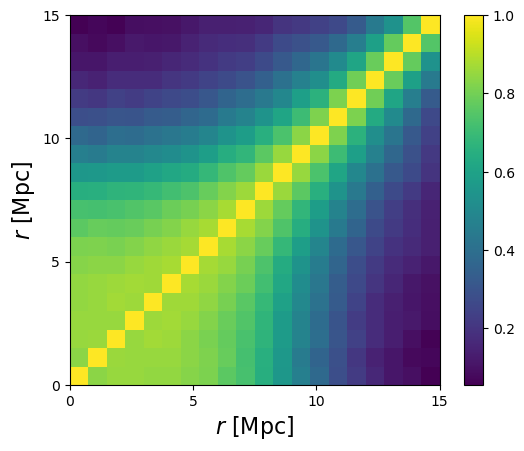

In [7]:
#plotando a correlação

cm = np.corrcoef(omega_all, rowvar=False)

plt.imshow(cm, origin='lower', extent=[0,15,0,15])
plt.colorbar()
plt.xlabel('$r$ [Mpc]', fontsize=16)
plt.ylabel('$r$ [Mpc]', fontsize=16)
plt.xticks(range(0, 16, 5))
plt.yticks(range(0, 16, 5))
plt.savefig('./corr_matrix.pdf', bbox_inches='tight', pad_inches = 0.1)
plt.show()


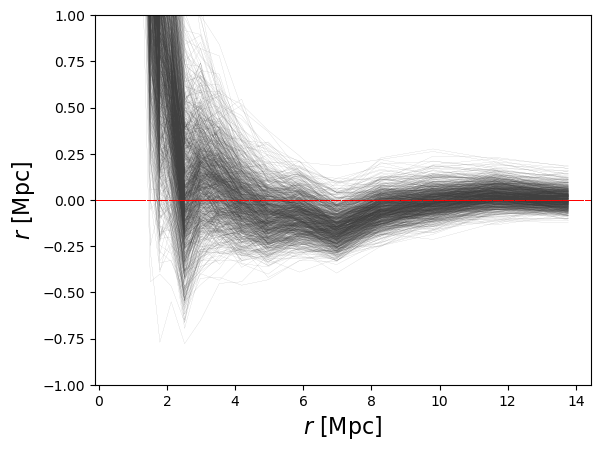

In [8]:
#plotando a diferença entre a correlção usando a matriz cox e as fontes de HI

for k in range(1, m+1):
    om = np.genfromtxt('xi/xi_' + str(k) + '.dat', delimiter='\t')
    xi_cox = om[:, 1]
    diff = xi_cox - xi_data
    plt.plot(r_data, diff, color=plt.cm.Greys(np.linspace(0.8, 1, 1)), linewidth=0.05)
    # plt.xlim(1.5, 10)
    plt.ylim(-1., 1.)
    plt.xlabel('$r$ [Mpc]', fontsize=16)
    plt.ylabel('$r$ [Mpc]', fontsize=16)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.savefig('./diff_cox_data.png', bbox_inches='tight', pad_inches = 0.1)